In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axisartist.axislines import SubplotZero
import sys
sys.path.append('../')
from functions import arrowed_spines

Figure 13.1: Energy, distance and reaction scheme for an electron transfer reaction in solution

In [2]:
# Small potential
x_s = np.linspace(-10, 10, 1000)
y_s = 2*x_s**2+90
# Large potential
x_l = np.linspace(-20, 20, 1000)
y_l = 0.75*x_l**2+19

# Connection between potentials
x_c = np.linspace(-1.5, 1.5, 1000)
y_c = 6.8*x_c**2+185
y_c_r = -6.9*x_c**2+149

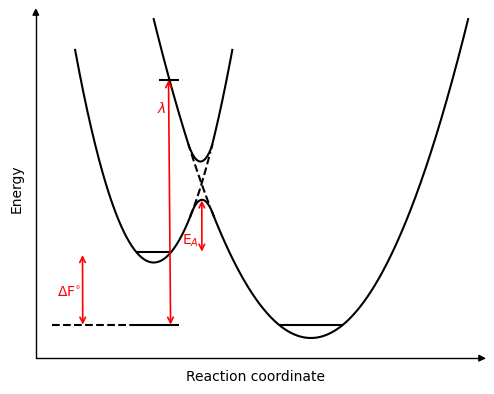

In [ ]:
fig = plt.figure(figsize = (5,4))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)


# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

# Small potential
ax.plot(x_s[:746]+15, y_s[:746], color = 'k')
ax.plot(x_s[756:861]+15, y_s[756:861], color = 'k', ls = '--') # Dotted connection
ax.plot(x_s[866:]+15, y_s[866:], color = 'k')
# Large potential
ax.plot(x_l[:116]+35, y_l[:116], color = 'k')
ax.plot(x_l[120:180]+35, y_l[120:180], color = 'k', ls = '--') # Dotted connection
ax.plot(x_l[185:]+35, y_l[185:], color = 'k')

# Upper connection between potentials
ax.plot(x_c+20.95, y_c, color = 'k')
# Lower connection btween potentials
ax.plot(x_c+21.15, y_c_r, color = 'k')

# Horizontal line at upper lambda limit
ax.scatter(x_l[50]+35, y_l[50], color = 'k', marker = '_', s = 200)
# Vibrational state, small potential 
ax.hlines(y_s[390], x_s[390]+15, x_s[609]+15, color = 'k')
# Vibrational state, large potential
ax.hlines(y_l[400], x_l[400]+35, x_l[599]+35, color = 'k')
# Horizontal line at lower lambda limit
ax.hlines(y_l[400], x_s[350]+15, x_s[660]+15, color = 'k')
# Dotted line at lower DeltaF limit
ax.hlines(y_l[400], 2, x_s[350]+15, color = 'k', ls = '--')

# DeltaF arrow
ax.annotate(' ', xy = (x_s[47]+15, y_s[390]), xytext = (x_s[35]+15, y_l[500]-3), 
            arrowprops=({'arrowstyle': '<->', 'lw': 1.2, 'color':'r'}))
ax.text(x_s[40]+11.9, y_l[320], r'$\Delta$F$^{\circ}$', color = 'r')
# lambda arrow
ax.annotate(' ', xy = (x_l[47]+35, y_l[48]), xytext = (x_l[47]+35, y_l[500]-3), 
            arrowprops=({'arrowstyle': '<->', 'lw': 1.2, 'color':'r'}))
ax.text(x_l[10]+35, y_l[80], r'$\lambda$', color = 'r')
# E_A arrow
ax.annotate(' ', xy = (x_c[540]+21, max(y_c_r)+2), xytext = (x_c[450]+21, y_s[390]-15), 
            arrowprops=({'arrowstyle': '<->', 'lw': 1.2, 'color':'r'}))
ax.text(x_c[0]+20.1, y_s[300]-15, r'E$_{A}$', color = 'r')

ax.set_xlim(0, 56)
ax.set_ylim(0, 320)

ax.set_ylabel('Energy')
ax.set_xlabel('Reaction coordinate')

plt.tight_layout()
plt.savefig('EDR.png', dpi = 150)
plt.show()

Figure 13.2: Energy profiles for the three cases of an electron transfer reaction in solution

In [ ]:
# -lamba < DeltaF
x_a = np.linspace(-4.5, 4.5, 1000)
y_a = 0.7*x_a**2

# -lamba = DeltaF
x_b1 = np.linspace(-3.5, 3.5, 1000) # AB+C
y_b1 = x_b1**2 # AB+C
x_b2 = np.linspace(-5, 5, 1000) # A+BC (also for -lamba > DeltaF)
y_b2 = x_b2**2 # A+BC

# -lamba > DeltaF
x_c1 = np.linspace(-4, 4, 1000)
y_c1 = x_c1**2 # AB+C
y_c2 = 1.25*x_b2**2 # A+BC

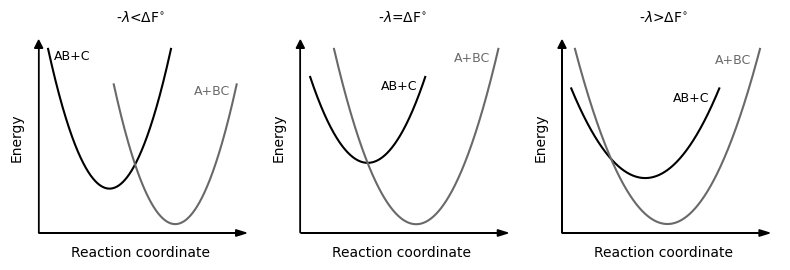

In [20]:
fig, axes = plt.subplots(1, 3, figsize = (8, 2.8))

# -lamba < DeltaF
axes[0].plot(x_a+5.19, y_a+4.5, color = 'k') # AB+C
axes[0].text(x_a[50]+5.19, y_a[20]+4.5, 'AB+C', fontsize = 9)
axes[0].plot(x_a+10, y_a+0.9, color = 'dimgrey') # A+BC
axes[0].text(x_a[950]+10, y_a[980]+0.9, 'A+BC', fontsize = 9, color = 'dimgrey', ha = 'right')
axes[0].set_title(r'-$\lambda$<$\Delta$F$^{\circ}$', fontsize = 10)

# -lambda = DeltaF
axes[1].plot(x_b1+4.1, y_b1+10, color = 'k') # AB+C
axes[1].text(x_b1[930]+4.1, y_b1[960]+10, 'AB+C', fontsize = 9, ha = 'right')
axes[1].plot(x_b2+7.05, y_b2+1.25, color = 'dimgrey') # A+BC
axes[1].text(x_b2[950]+7.05, y_b2[980]+1.25, 'A+BC', fontsize = 9, color = 'dimgrey', ha = 'right')
axes[1].set_title(r'-$\lambda$=$\Delta$F$^{\circ}$', fontsize = 10)

# -lambda > DeltaF
axes[2].plot(x_c1+4.5, y_c1+9.8, color = 'k') # AB+C
axes[2].text(x_c1[930]+4.5, y_c1[960]+9.8, 'AB+C', fontsize = 9, ha = 'right')
axes[2].plot(x_b2+5.7, y_c2+1.6, color = 'dimgrey') # A+BC
axes[2].text(x_b2[950]+5.7, y_b2[995]+5.5, 'A+BC', fontsize = 9, color = 'dimgrey', ha = 'right')
axes[2].set_title(r'-$\lambda$>$\Delta$F$^{\circ}$', fontsize = 10)

# Create axes with arrows
for ax in axes:
    arrowed_spines(fig, ax)
    # Remove axis tick labels
    ax.set_xticks([])
    ax.set_yticks([])
    # Set axis labels
    ax.set_xlabel('Reaction coordinate', labelpad = 0)
    ax.set_ylabel('Energy', labelpad = 0)

plt.tight_layout()
plt.savefig('Eprofile.png', dpi=150)
plt.show()